In [1]:
# Importing Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import models
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelBinarizer

Using TensorFlow backend.


In [2]:
# Loading Data
iris = pd.read_csv('Iris.csv')

In [3]:
# Checking the Loaded Iris Data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking the Dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
# Available Dataset Columns
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Checking the Shape
iris.shape

(150, 6)

In [7]:
# Checking uniquq values in Species Col
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/home/ibadi123/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


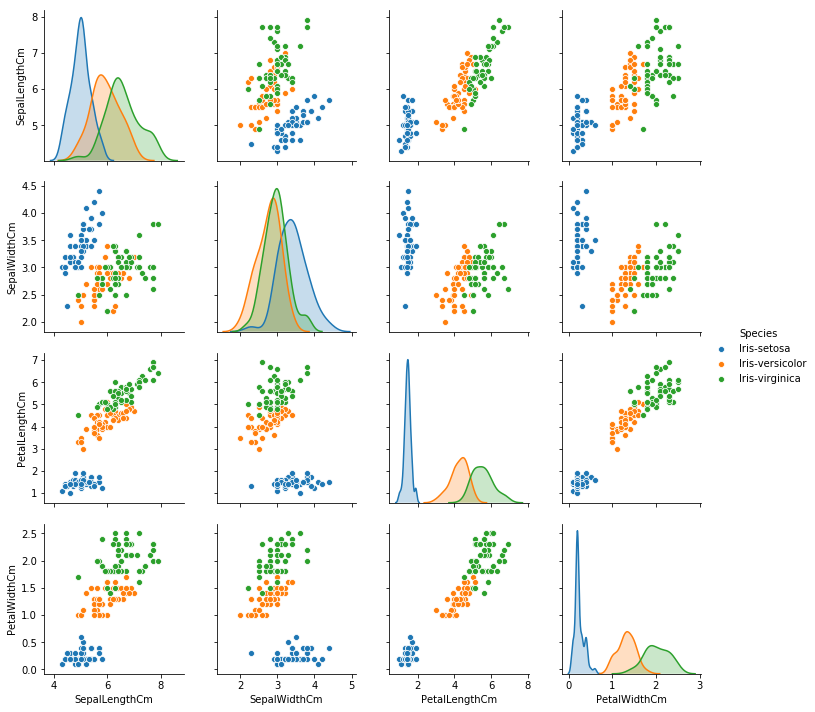

In [8]:
# Plotting pairwise relationship in Iris Dataset
sns.pairplot(data = iris[iris.columns[1:]], hue="Species")
plt.show()

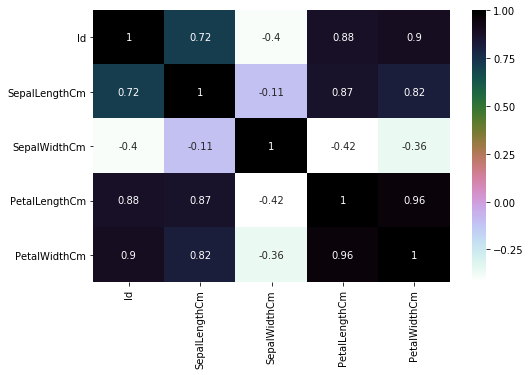

In [9]:
# Plotting a Heatmap
plt.figure(figsize = (8,5))
sns.heatmap(iris.corr(), annot = True, cmap = "cubehelix_r")

/home/ibadi123/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  
/home/ibadi123/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:934: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


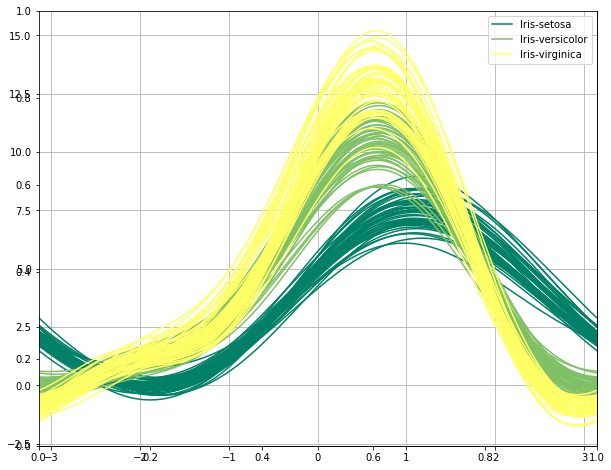

In [10]:
# Plotting Andrews Curve
plt.subplots(figsize = (10,8))
from pandas.tools import plotting

cmap = plt.get_cmap('summer') 
plotting.andrews_curves(iris.drop("Id", axis=1), "Species", colormap = cmap)
plt.show()

In [11]:
# Dropping the ID column
iris.drop('Id', axis = 1, inplace = True)

In [12]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
# Separating X and Y
X = iris.drop(['Species'], axis = 1)
Y = iris.drop(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], axis = 1)

In [14]:
# Checking X head
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# Checking Y head
Y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [16]:
# Preprocessing Data using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [17]:
# Converting the Targets to Numbers
Y = Y[['Species']].replace(Y['Species'].unique(), [0,1,2])

In [18]:
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [19]:
X

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


In [20]:
# Converting the Data into Cateogrical Form
X = StandardScaler().fit_transform(X)
Y = LabelBinarizer().fit_transform(Y)

In [21]:
# Imporing Train and Test Data split lib and applying
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [22]:
# Building a Model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense( 12, activation = "relu", input_shape = (4,) ))
    model.add(layers.Dense( 15, activation = "relu" ))
    model.add(layers.Dense( 8, activation = "relu" ))
    model.add(layers.Dense( 10, activation = "relu" ))
    model.add(layers.Dense( 3, activation = "softmax" ))
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [23]:
# Initializing K-Fold Validation
k = 3
num_val_samples = len(x_train) // k
num_epochs = 150
val_loss_scores = []
loss_scores = []

In [24]:
# Running the K-Fold Validation
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, validation_data = (val_data, val_targets), batch_size = 16)
    val_loss = history.history['val_loss']
    loss = history.history['loss']
    val_loss_scores.append(val_loss)
    loss_scores.append(loss)

processing fold # 0
Train on 80 samples, validate on 40 samples
Epoch 1/150
80/80 [==============================] - 1s 17ms/step - loss: 1.0969 - acc: 0.3625 - val_loss: 1.0894 - val_acc: 0.3500
Epoch 2/150
80/80 [==============================] - 0s 205us/step - loss: 1.0871 - acc: 0.3750 - val_loss: 1.0810 - val_acc: 0.3250
Epoch 3/150
80/80 [==============================] - 0s 387us/step - loss: 1.0768 - acc: 0.4000 - val_loss: 1.0719 - val_acc: 0.3250
Epoch 4/150
80/80 [==============================] - 0s 352us/step - loss: 1.0631 - acc: 0.4250 - val_loss: 1.0611 - val_acc: 0.3250
Epoch 5/150
80/80 [==============================] - 0s 355us/step - loss: 1.0486 - acc: 0.5750 - val_loss: 1.0475 - val_acc: 0.4750
Epoch 6/150
80/80 [==============================] - 0s 523us/step - loss: 1.0297 - acc: 0.6375 - val_loss: 1.0321 - val_acc: 0.5500
Epoch 7/150
80/80 [==============================] - 0s 325us/step - loss: 1.0101 - acc: 0.6625 - val_loss: 1.0160 - val_acc: 0.5750
Epoch 

Epoch 62/150
80/80 [==============================] - 0s 307us/step - loss: 0.3146 - acc: 0.9500 - val_loss: 0.2659 - val_acc: 1.0000
Epoch 63/150
80/80 [==============================] - 0s 340us/step - loss: 0.3092 - acc: 0.9500 - val_loss: 0.2622 - val_acc: 1.0000
Epoch 64/150
80/80 [==============================] - 0s 263us/step - loss: 0.3034 - acc: 0.9500 - val_loss: 0.2554 - val_acc: 1.0000
Epoch 65/150
80/80 [==============================] - 0s 312us/step - loss: 0.2976 - acc: 0.9500 - val_loss: 0.2472 - val_acc: 1.0000
Epoch 66/150
80/80 [==============================] - 0s 341us/step - loss: 0.2917 - acc: 0.9500 - val_loss: 0.2405 - val_acc: 1.0000
Epoch 67/150
80/80 [==============================] - 0s 285us/step - loss: 0.2867 - acc: 0.9500 - val_loss: 0.2365 - val_acc: 1.0000
Epoch 68/150
80/80 [==============================] - 0s 312us/step - loss: 0.2797 - acc: 0.9500 - val_loss: 0.2286 - val_acc: 1.0000
Epoch 69/150
80/80 [==============================] - 0s 372us

Epoch 123/150
80/80 [==============================] - 0s 310us/step - loss: 0.1015 - acc: 0.9875 - val_loss: 0.0696 - val_acc: 1.0000
Epoch 124/150
80/80 [==============================] - 0s 248us/step - loss: 0.0998 - acc: 0.9875 - val_loss: 0.0738 - val_acc: 0.9750
Epoch 125/150
80/80 [==============================] - 0s 347us/step - loss: 0.0982 - acc: 0.9875 - val_loss: 0.0730 - val_acc: 0.9750
Epoch 126/150
80/80 [==============================] - 0s 297us/step - loss: 0.0968 - acc: 0.9875 - val_loss: 0.0687 - val_acc: 0.9750
Epoch 127/150
80/80 [==============================] - 0s 304us/step - loss: 0.0952 - acc: 0.9875 - val_loss: 0.0671 - val_acc: 0.9750
Epoch 128/150
80/80 [==============================] - 0s 300us/step - loss: 0.0937 - acc: 0.9875 - val_loss: 0.0680 - val_acc: 0.9750
Epoch 129/150
80/80 [==============================] - 0s 417us/step - loss: 0.0924 - acc: 0.9875 - val_loss: 0.0677 - val_acc: 0.9750
Epoch 130/150
80/80 [==============================] - 

80/80 [==============================] - 0s 288us/step - loss: 0.4976 - acc: 0.8375 - val_loss: 0.3626 - val_acc: 0.8250
Epoch 34/150
80/80 [==============================] - 0s 430us/step - loss: 0.4894 - acc: 0.8500 - val_loss: 0.3565 - val_acc: 0.8250
Epoch 35/150
80/80 [==============================] - 0s 354us/step - loss: 0.4827 - acc: 0.8500 - val_loss: 0.3511 - val_acc: 0.8250
Epoch 36/150
80/80 [==============================] - 0s 324us/step - loss: 0.4740 - acc: 0.8500 - val_loss: 0.3447 - val_acc: 0.8250
Epoch 37/150
80/80 [==============================] - 0s 314us/step - loss: 0.4658 - acc: 0.8500 - val_loss: 0.3383 - val_acc: 0.8250
Epoch 38/150
80/80 [==============================] - 0s 268us/step - loss: 0.4577 - acc: 0.8500 - val_loss: 0.3324 - val_acc: 0.8250
Epoch 39/150
80/80 [==============================] - 0s 343us/step - loss: 0.4496 - acc: 0.8625 - val_loss: 0.3275 - val_acc: 0.8250
Epoch 40/150
80/80 [==============================] - 0s 358us/step - loss:

80/80 [==============================] - 0s 333us/step - loss: 0.0509 - acc: 0.9875 - val_loss: 0.2260 - val_acc: 0.9500
Epoch 95/150
80/80 [==============================] - 0s 349us/step - loss: 0.0505 - acc: 0.9875 - val_loss: 0.2169 - val_acc: 0.9500
Epoch 96/150
80/80 [==============================] - 0s 220us/step - loss: 0.0482 - acc: 0.9875 - val_loss: 0.2203 - val_acc: 0.9500
Epoch 97/150
80/80 [==============================] - 0s 414us/step - loss: 0.0469 - acc: 0.9875 - val_loss: 0.2224 - val_acc: 0.9500
Epoch 98/150
80/80 [==============================] - 0s 307us/step - loss: 0.0462 - acc: 0.9875 - val_loss: 0.2209 - val_acc: 0.9500
Epoch 99/150
80/80 [==============================] - 0s 274us/step - loss: 0.0463 - acc: 0.9875 - val_loss: 0.2208 - val_acc: 0.9500
Epoch 100/150
80/80 [==============================] - 0s 311us/step - loss: 0.0457 - acc: 0.9875 - val_loss: 0.2306 - val_acc: 0.9500
Epoch 101/150
80/80 [==============================] - 0s 344us/step - los

80/80 [==============================] - 0s 356us/step - loss: 1.0406 - acc: 0.4375 - val_loss: 1.0186 - val_acc: 0.6000
Epoch 5/150
80/80 [==============================] - 0s 388us/step - loss: 1.0255 - acc: 0.4375 - val_loss: 1.0022 - val_acc: 0.6000
Epoch 6/150
80/80 [==============================] - 0s 277us/step - loss: 1.0092 - acc: 0.4375 - val_loss: 0.9857 - val_acc: 0.6000
Epoch 7/150
80/80 [==============================] - 0s 381us/step - loss: 0.9939 - acc: 0.4500 - val_loss: 0.9679 - val_acc: 0.6250
Epoch 8/150
80/80 [==============================] - 0s 355us/step - loss: 0.9770 - acc: 0.4875 - val_loss: 0.9493 - val_acc: 0.6750
Epoch 9/150
80/80 [==============================] - 0s 286us/step - loss: 0.9591 - acc: 0.5750 - val_loss: 0.9293 - val_acc: 0.6500
Epoch 10/150
80/80 [==============================] - 0s 284us/step - loss: 0.9377 - acc: 0.5625 - val_loss: 0.9077 - val_acc: 0.7000
Epoch 11/150
80/80 [==============================] - 0s 274us/step - loss: 0.91

80/80 [==============================] - 0s 261us/step - loss: 0.0904 - acc: 0.9875 - val_loss: 0.2009 - val_acc: 0.9500
Epoch 66/150
80/80 [==============================] - 0s 245us/step - loss: 0.0847 - acc: 0.9875 - val_loss: 0.1968 - val_acc: 0.9500
Epoch 67/150
80/80 [==============================] - 0s 227us/step - loss: 0.0807 - acc: 0.9875 - val_loss: 0.1947 - val_acc: 0.9500
Epoch 68/150
80/80 [==============================] - 0s 398us/step - loss: 0.0764 - acc: 0.9875 - val_loss: 0.1857 - val_acc: 0.9250
Epoch 69/150
80/80 [==============================] - 0s 264us/step - loss: 0.0717 - acc: 0.9875 - val_loss: 0.1820 - val_acc: 0.9250
Epoch 70/150
80/80 [==============================] - 0s 280us/step - loss: 0.0678 - acc: 0.9875 - val_loss: 0.1803 - val_acc: 0.9250
Epoch 71/150
80/80 [==============================] - 0s 431us/step - loss: 0.0653 - acc: 0.9875 - val_loss: 0.1755 - val_acc: 0.9250
Epoch 72/150
80/80 [==============================] - 0s 231us/step - loss:

80/80 [==============================] - 0s 327us/step - loss: 0.0120 - acc: 1.0000 - val_loss: 0.1631 - val_acc: 0.9000
Epoch 127/150
80/80 [==============================] - 0s 253us/step - loss: 0.0117 - acc: 1.0000 - val_loss: 0.1634 - val_acc: 0.9000
Epoch 128/150
80/80 [==============================] - 0s 410us/step - loss: 0.0113 - acc: 1.0000 - val_loss: 0.1632 - val_acc: 0.9000
Epoch 129/150
80/80 [==============================] - 0s 473us/step - loss: 0.0118 - acc: 1.0000 - val_loss: 0.1607 - val_acc: 0.9000
Epoch 130/150
80/80 [==============================] - 0s 364us/step - loss: 0.0112 - acc: 1.0000 - val_loss: 0.1623 - val_acc: 0.9000
Epoch 131/150
80/80 [==============================] - 0s 493us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.1647 - val_acc: 0.9000
Epoch 132/150
80/80 [==============================] - 0s 422us/step - loss: 0.0111 - acc: 1.0000 - val_loss: 0.1702 - val_acc: 0.9000
Epoch 133/150
80/80 [==============================] - 0s 395us/step 

In [25]:
# Averaging the Val_loss and Loss scores
average_loss_val_history = [np.mean([x[i] for x in val_loss_scores]) for i in range(num_epochs)]
average_loss_history = [np.mean([x[i] for x in loss_scores]) for i in range(num_epochs)]

In [26]:
# Writing a function for plotting a smooth curve
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [27]:
# Applying the function to Average Data
smooth_val_loss_history = smooth_curve(average_loss_val_history[10:])
smooth_loss_history = smooth_curve(average_loss_history[10:])

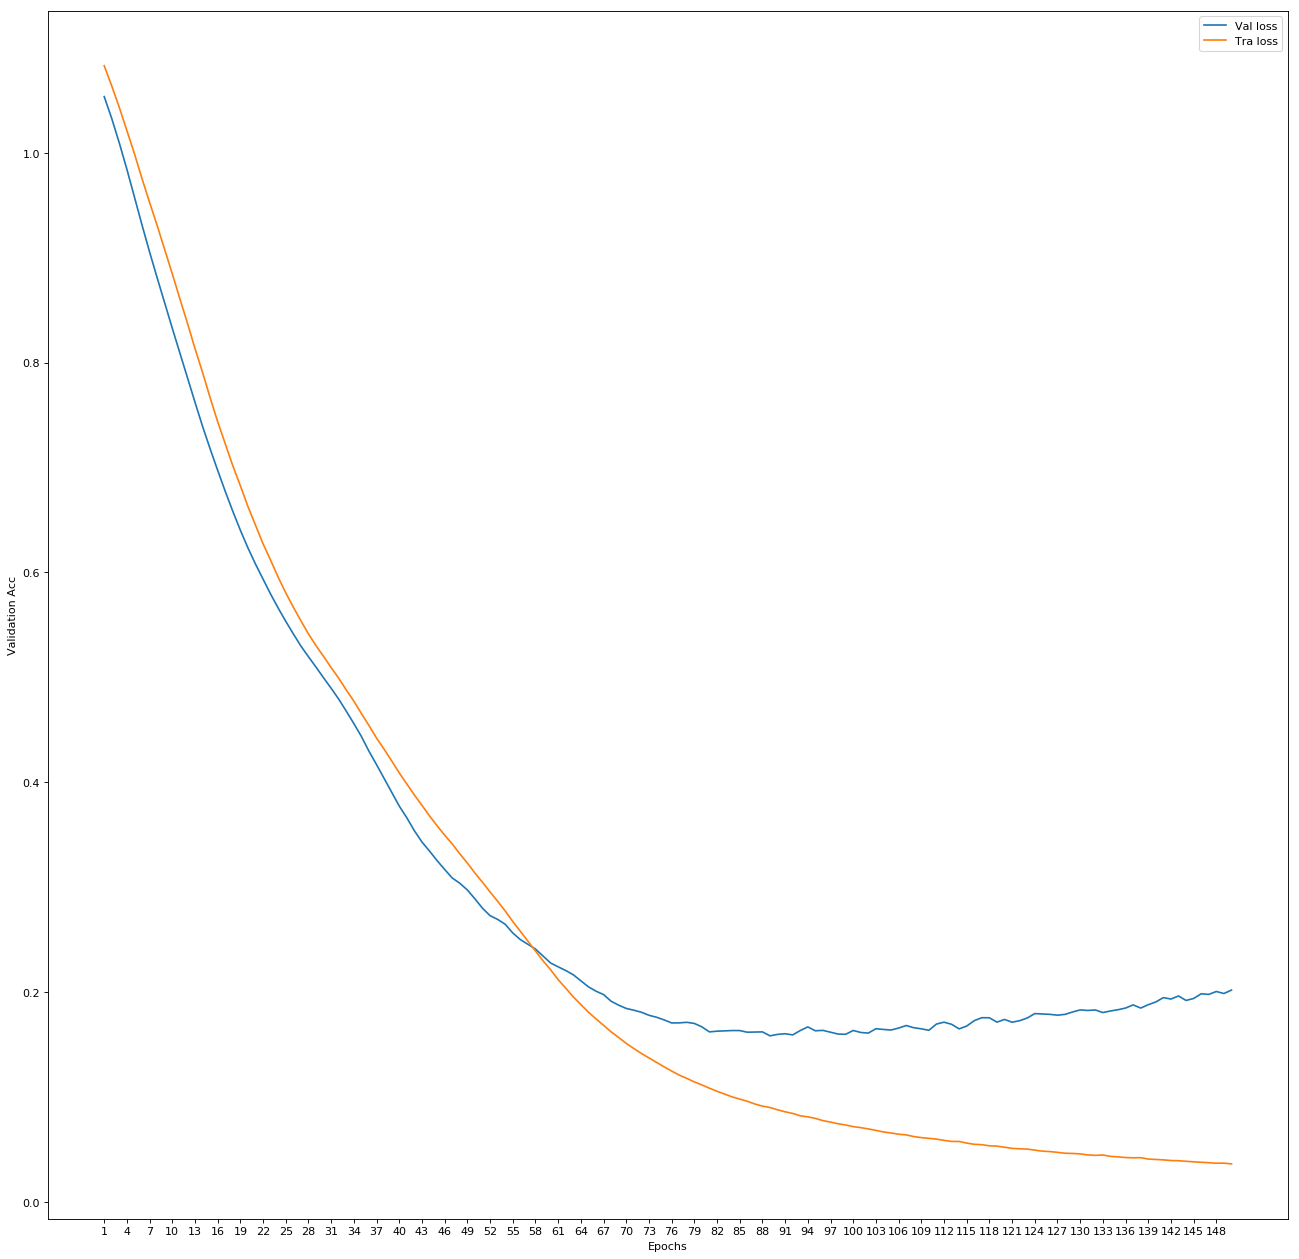

In [28]:
# Plotting the Data
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, len(average_loss_val_history) + 1), average_loss_val_history, label='Val loss')
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history, label='Tra loss')
plt.xticks(np.arange(min(range(1, len(average_loss_val_history) + 1)), max(range(1, len(average_loss_val_history) + 1))+1, 3.0))
plt.xlabel('Epochs')
plt.ylabel('Validation Acc')
plt.legend()
plt.show()

In [23]:
# Reset and Making a New Model
model = build_model()
model.fit(x_train, y_train, batch_size = 16, epochs = 96)

Epoch 1/96
120/120 [==============================] - 0s 3ms/step - loss: 1.1526 - acc: 0.3583
Epoch 2/96
120/120 [==============================] - 0s 245us/step - loss: 1.1008 - acc: 0.3583
Epoch 3/96
120/120 [==============================] - 0s 185us/step - loss: 1.0605 - acc: 0.3583
Epoch 4/96
120/120 [==============================] - 0s 231us/step - loss: 1.0292 - acc: 0.3667
Epoch 5/96
120/120 [==============================] - 0s 225us/step - loss: 1.0014 - acc: 0.3667
Epoch 6/96
120/120 [==============================] - 0s 340us/step - loss: 0.9755 - acc: 0.3750
Epoch 7/96
120/120 [==============================] - 0s 265us/step - loss: 0.9497 - acc: 0.4333
Epoch 8/96
120/120 [==============================] - 0s 357us/step - loss: 0.9231 - acc: 0.6583
Epoch 9/96
120/120 [==============================] - 0s 207us/step - loss: 0.8929 - acc: 0.7000
Epoch 10/96
120/120 [==============================] - 0s 216us/step - loss: 0.8636 - acc: 0.7000
Epoch 11/96
120/120 [==========

120/120 [==============================] - 0s 196us/step - loss: 0.0472 - acc: 0.9833
Epoch 85/96
120/120 [==============================] - 0s 278us/step - loss: 0.0440 - acc: 0.9833
Epoch 86/96
120/120 [==============================] - 0s 238us/step - loss: 0.0438 - acc: 0.9833
Epoch 87/96
120/120 [==============================] - 0s 279us/step - loss: 0.0425 - acc: 0.9833
Epoch 88/96
120/120 [==============================] - 0s 308us/step - loss: 0.0432 - acc: 0.9833
Epoch 89/96
120/120 [==============================] - 0s 284us/step - loss: 0.0408 - acc: 0.9833
Epoch 90/96
120/120 [==============================] - 0s 276us/step - loss: 0.0482 - acc: 0.9833
Epoch 91/96
120/120 [==============================] - 0s 249us/step - loss: 0.0410 - acc: 0.9833
Epoch 92/96
120/120 [==============================] - 0s 290us/step - loss: 0.0440 - acc: 0.9750
Epoch 93/96
120/120 [==============================] - 0s 298us/step - loss: 0.0418 - acc: 0.9833
Epoch 94/96
120/120 [===========

In [24]:
# Evaluating the Data with Unseen Data
model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 2ms/step


[0.07599647343158722, 0.9666666388511658]

Conclusion:
- We achieved an accuracy of 96.6% on unseen test data.
- No dropout layers.
- Applied K-Fold to for training a reliable model.